## Independent $t$-test with R

This tutorial demonstrates how to perform an independent samples $t$-test in the R programming language. It assumes familiarity with $t$-tests, but does not assume any familiarity with programming beyond what can be learned on the  ['A very brief introduction to programming'](A_very_brief_introduction_to_programming.ipynb) page. If you are unfamiliar with R please read the ['A very brief introduction to programming'](A_very_brief_introduction_to_programming.ipynb) page first.

## Reading and organizing your data

For this tutorial we will use the 'Student Alcohol Consumption' dataset, which can be found here: 
https://www.kaggle.com/datasets/uciml/student-alcohol-consumption

Here is a description of the dataset, from the webpage just linked to:

> "The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students."

For this tutorial, we'll be analysing the relationship between the following variables:

* `sex` - student's sex (binary: 'F' - female or 'M' - male)
* `Walc` - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)


The cell below uses the `read_csv()`  to load a csv file containing the data. The code `df = ` saves the data as a variable, so we can access it in other cells of the notebook.The dataframe is shown below:

In [1]:
# press Contrl + Enter simultaneously to run this cell, or any other cell in this notebook
df = read.csv('data/student-mat.csv')

df

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19


*Note*: to use `read_csv()` the way it is used in the cell above (e.g. by passing it the name of the file we want to read in (`data/student-mat.csv`), the folder the csv file is in (`data/`) must be in the same folder as the notebook. th. You can use the function `getcwd()` to print out the current working directory to show the path of the folder you need to place the folder containing the csv file in:

In [2]:
getwd()

[1] "C:/Users/peter/r_tutorials"

## Selecting data

In this tutorial, we're only interested in two of the columns of the dataframe, so we can use label-based indexing to drop the columns we don't need.

In the cell below the code `df[c('sex', 'Walc')]` means 'give me just the `sex` and `Walc` column of the dataframe named `df`'.

This reduced dataframe is then saved as a variable called `clean_df`:

In [3]:
# get just the columns we need
clean_df = df[c('sex', 'Walc')]

# show the contents of the new dataframe
clean_df

sex,Walc
<chr>,<int>
F,1
F,1
F,3
F,1
F,2
M,2
M,1
F,1
M,1


We can easily get R to show us descriptive statistics, using the `summary()` function:

In [4]:
summary(clean_df)

     sex                 Walc      
 Length:395         Min.   :1.000  
 Class :character   1st Qu.:1.000  
 Mode  :character   Median :2.000  
                    Mean   :2.291  
                    3rd Qu.:3.000  
                    Max.   :5.000  

The independent samples $t$-test is used to test for a difference between the means of a quantitative outcome variable, between two groups.

In this case, we will test for difference in `Walc` (weekend alcohol consumption) using `sex` (male or female) as our indpendent group variable.

We can use the `subset()` command to get the data for just the males. The code `subset(clean_df, sex == 'M')` reads 'from the `clean_df` dataframe, get me just the rows where `sex` equals `M` (e.g. `sex == M`, where `==` means 'is equal to'):

In [5]:
# get just the male rows
males = subset(clean_df, sex == 'M')

# show the contents of the `males` variable
males

,sex,Walc
,<chr>,<int>
6,M,2
7,M,1
9,M,1
10,M,1
13,M,3
14,M,2
15,M,1
19,M,4
20,M,3


We can  repeat this process to get the data for just the females. The code `subset(clean_df, sex == 'F')` reads 'from the `clean_df` dataframe, get me just the rows where `sex` equals `F` (e.g. `sex == F`, where `==` means 'is equal to'):

In [6]:
# get just the female rows
females = subset(clean_df, sex == 'F')

# show the contents of the females variable
females

,sex,Walc
,<chr>,<int>
1,F,1
2,F,1
3,F,3
4,F,1
5,F,2
8,F,1
11,F,2
12,F,1
16,F,2


Once again, we can use the `summary()` function to get descriptive statistics for the `males` and `females` data:

In [7]:
# descriptive statistics for the males dataframe
summary(males)

     sex                 Walc      
 Length:187         Min.   :1.000  
 Class :character   1st Qu.:1.000  
 Mode  :character   Median :3.000  
                    Mean   :2.663  
                    3rd Qu.:4.000  
                    Max.   :5.000  

In [8]:
# descriptive statistics for the females dataframe
summary(females)

     sex                 Walc      
 Length:208         Min.   :1.000  
 Class :character   1st Qu.:1.000  
 Mode  :character   Median :2.000  
                    Mean   :1.957  
                    3rd Qu.:3.000  
                    Max.   :5.000  

## Plotting your data

As always, R makes it easy to produce sharp-looking plots.

To get a histogram of the `Walc` scores from the `females` dataframe, we can use the `hist()` function.

We pass `females$Walc` to the `hist()` function. `females$Walc` reads 'get me the `Walc` column of the `females` dataframe:

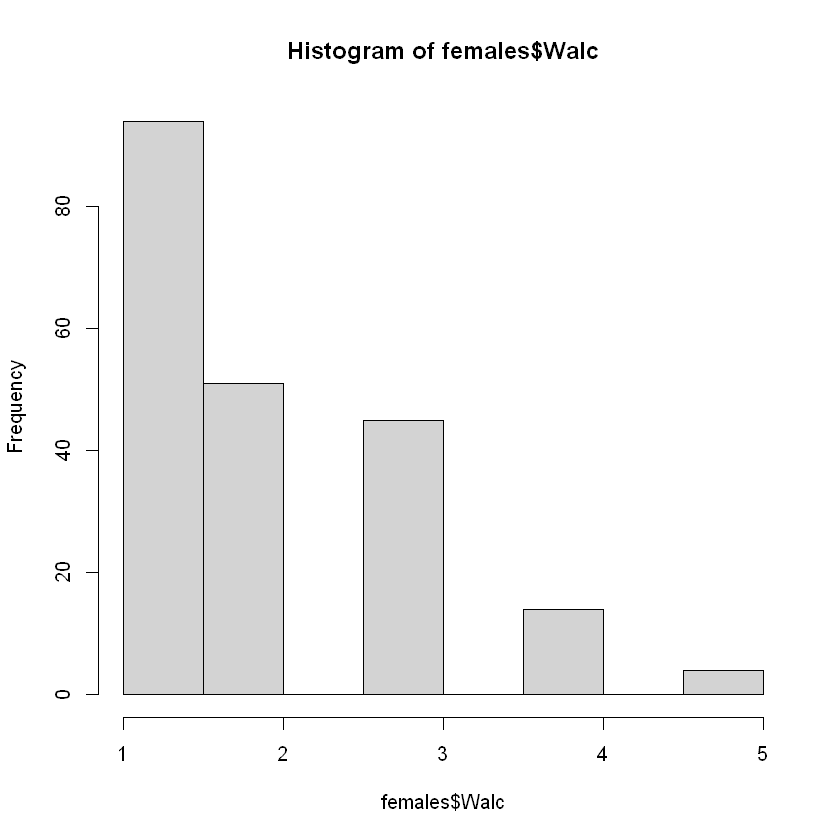

In [9]:
# a histogram of the Walc scores for the females
hist(females$Walc)

We can do the same for the `males` data:

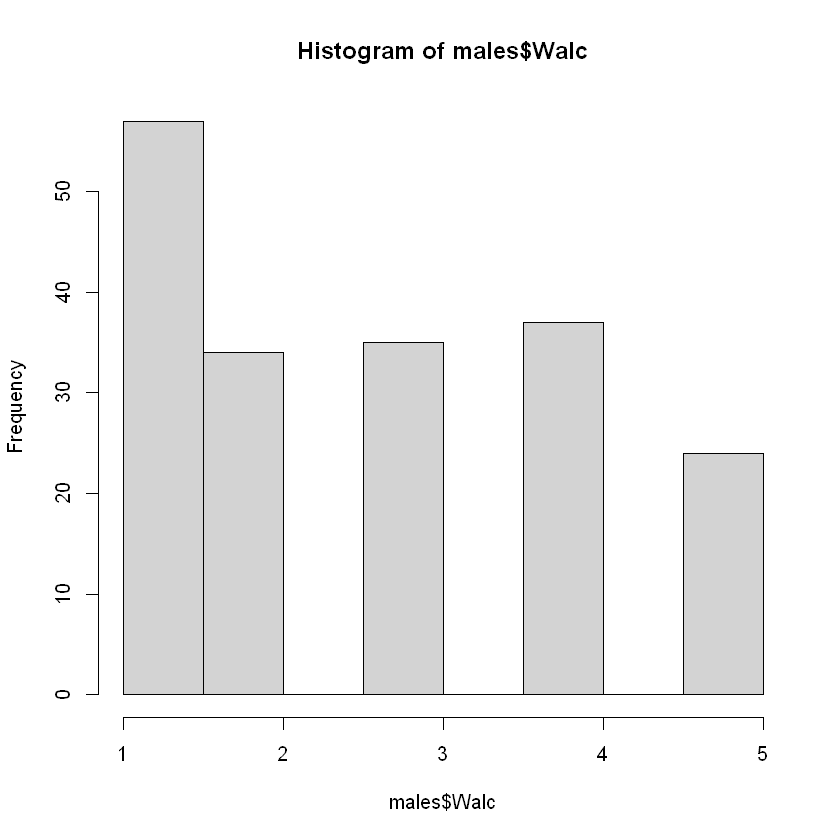

In [10]:
# a histogram of the Walc scores for the males
hist(males$Walc)

[Introduce boxplot]

Loading required package: ggplot2



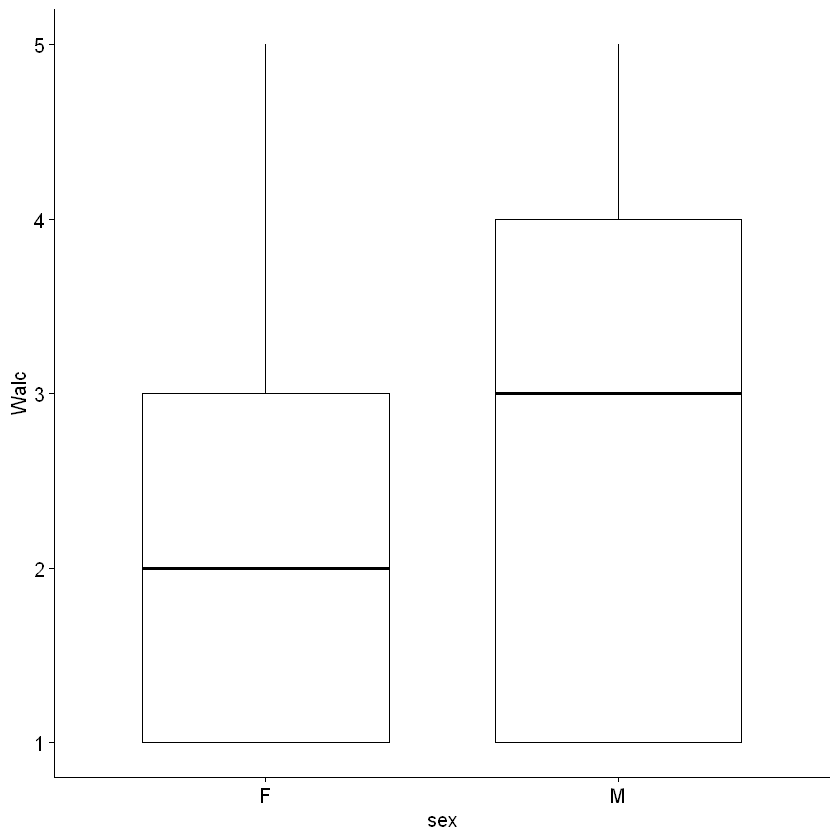

In [11]:
# import the ggpubr library
library(ggpubr)

# create the boxplot
ggboxplot(clean_df, x = "sex", 
          y = "Walc")

## Independent samples t-test

To perform the independent $t$-test takes just one line of code, using the `t.test()` function.

As always, if you want to read the documentation for a function you can place `?` before the name of the function, and run the cell.

The cell below pulls up the documentation for the `t.test()` function (in case you are not using an interactive version of this notebook, the documentation is also shown as an image, below the cell).

In [12]:
?t.test()

![](images/ttest_doc.png)

If you look in the `Usage` section of the documentation, everything shown in the brackets after `t.test` are the *arguments* that the function can accept.

`x` contains the outcome variable scores for one of the groups.

`y` contains the outcome variable scores for the other group.

These are the only arguments we need. You can see that the `paired =` argument is set to `FALSE` by default, meaning the `t-test()` function by default assumes independent samples.

To perform our independent samples $t$-test on this data we use `t.test(females$Walc, males$Walc)`, which reads "perform an independent samples t-test, comparing the mean female `Walc` score to the mean male `Walc` score:

In [13]:
# perform the t-test
t.test(females$Walc, males$Walc)


	Welch Two Sample t-test

data:  females$Walc and males$Walc
t = -5.5666, df = 341.41, p-value = 5.263e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.9559649 -0.4567768
sample estimates:
mean of x mean of y 
 1.956731  2.663102 


## Assumptions

Check for the normality of each group:

In [14]:
shapiro.test(females$Walc)


	Shapiro-Wilk normality test

data:  females$Walc
W = 0.81371, p-value = 4.831e-15


In [15]:
shapiro.test(males$Walc)


	Shapiro-Wilk normality test

data:  males$Walc
W = 0.8701, p-value = 1.341e-11


[Introduce graph]

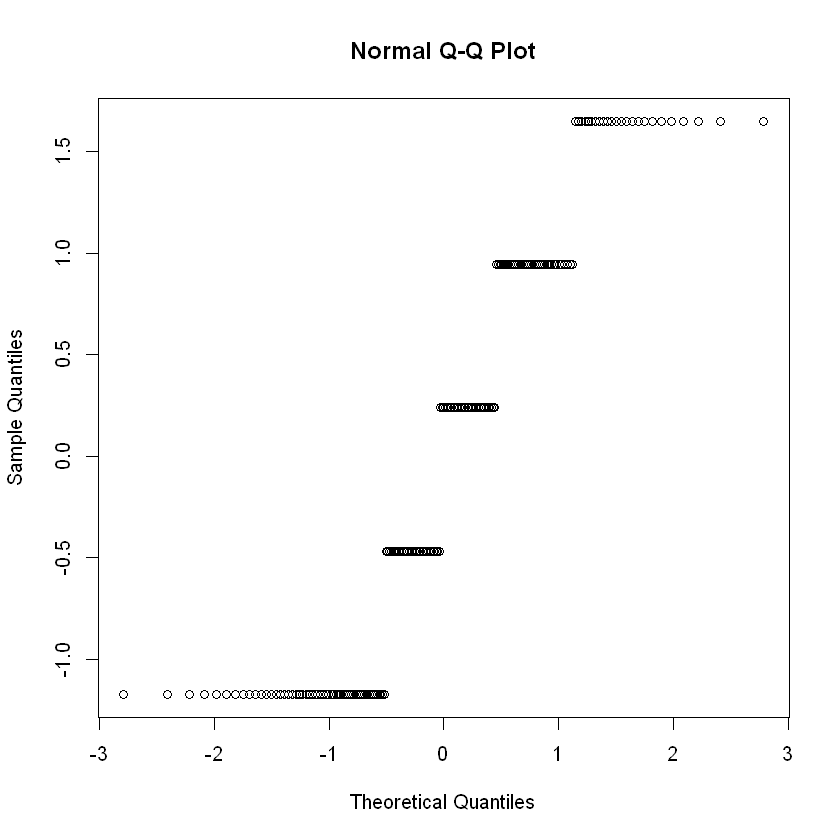

In [16]:
male_zscores = (males$Walc - mean(males$Walc)) / sd(males$Walc)

qqnorm(male_zscores)

[$t$-test is robust to the violation of the normality assumption]

[But we might considering using a nonparametric alternative, like the independent samples Mann-Whitney-Wilcoxon test instead.]

[This is also easy in R]

In [17]:
# Mann-Whitney-Wilcoxon test
wilcox.test(females$Walc, males$Walc)


	Wilcoxon rank sum test with continuity correction

data:  females$Walc and males$Walc
W = 14058, p-value = 7.418e-07
alternative hypothesis: true location shift is not equal to 0


## Summary

This very brief tutorial has shown how to:

* import data to R from a csv file and store it in a dataframe
* retrieve rows of the dataframe, either by integer indexing or label-based indexing
* generate histograms, scatterplots and various diagnostic plots
* fit linear regression models
* run various assumption-checking tests on linear regression models

I hope it is apparent that, were it not for the text cells in this notebook, all of the above can be achieved with relatively few lines of code. The numerous benefits of R include that:

- it is free, and easy to obtain
- new functionality is consistently added by the R community, enabling new types of analysis
- writing analyses in R means that the exact analysis performed (including how the data was cleaned and processed prior to model fitting) can easily be read and checked by others; promoting reproducibility and open science